# Decision Trees Regression

We will use the drinks data (which we used in weeks 1 & 2) again.

In [1]:
# import pandas, sklearn.tree, sklearn.grid_search
import pandas as pd
import sklearn.tree as tree
import sklearn.grid_search as grid

In [28]:
# load the data from data/drinks.csv into a dataframe.
drinks = pd.read_csv('c:/users/mohds/syd_dat_5/data/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [29]:
# Confirm that there are 6 different continents ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']
drinks.continent.fillna(value='NA', inplace=True)
drinks
set(drinks.continent)

{'AF', 'AS', 'EU', 'NA', 'OC', 'SA'}

In [30]:
# Add columns for each of these continents
import numpy as np
for continent in set(drinks.continent):
    drinks[continent] = np.where(drinks.continent == continent,1,0)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,AF,NA,OC,AS,EU,SA
0,Afghanistan,0,0,0,0.0,AS,0,0,0,1,0,0
1,Albania,89,132,54,4.9,EU,0,0,0,0,1,0
2,Algeria,25,0,14,0.7,AF,1,0,0,0,0,0
3,Andorra,245,138,312,12.4,EU,0,0,0,0,1,0
4,Angola,217,57,45,5.9,AF,1,0,0,0,0,0
5,Antigua & Barbuda,102,128,45,4.9,NA,0,1,0,0,0,0
6,Argentina,193,25,221,8.3,SA,0,0,0,0,0,1
7,Armenia,21,179,11,3.8,EU,0,0,0,0,1,0
8,Australia,261,72,212,10.4,OC,0,0,1,0,0,0
9,Austria,279,75,191,9.7,EU,0,0,0,0,1,0


In [31]:
# Create a decision tree regressor
drinks_regressor = tree.DecisionTreeRegressor(max_depth=3)

In [32]:
# Create a brute force tool with GridSearchCV
dtr = tree.DecisionTreeRegressor()
drinks_force = grid.GridSearchCV(dtr, {'max_depth':range(1,10)}, cv=10, scoring='r2')

In [33]:
# Use the continents, spirit servings and beer servings
# as the dependent variables
X = drinks[['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'beer_servings', 'spirit_servings']]
y = drinks.wine_servings

In [34]:
# Try to predict the number of wine servings
# drinks_regressor.fit(X,y)
# zip(drinks_regressor.predict(X), y)
drinks_regressor.fit(X,y)
zip(drinks_regressor.predict(X), y)

[(5.0135135135135132, 0),
 (195.7037037037037, 54),
 (5.0135135135135132, 14),
 (195.7037037037037, 312),
 (45.042553191489361, 45),
 (45.042553191489361, 45),
 (45.042553191489361, 221),
 (19.75, 11),
 (45.042553191489361, 212),
 (195.7037037037037, 191),
 (1.6666666666666667, 5),
 (45.042553191489361, 51),
 (5.0135135135135132, 7),
 (5.0135135135135132, 0),
 (45.042553191489361, 36),
 (19.75, 42),
 (195.7037037037037, 212),
 (45.042553191489361, 8),
 (5.0135135135135132, 13),
 (5.0135135135135132, 0),
 (45.042553191489361, 8),
 (19.75, 8),
 (45.042553191489361, 35),
 (45.042553191489361, 16),
 (5.0135135135135132, 1),
 (93.818181818181813, 94),
 (5.0135135135135132, 7),
 (16.26923076923077, 0),
 (5.0135135135135132, 7),
 (45.042553191489361, 16),
 (16.26923076923077, 1),
 (45.042553191489361, 4),
 (45.042553191489361, 100),
 (5.0135135135135132, 1),
 (5.0135135135135132, 1),
 (45.042553191489361, 172),
 (16.26923076923077, 8),
 (45.042553191489361, 3),
 (5.0135135135135132, 1),
 (16.

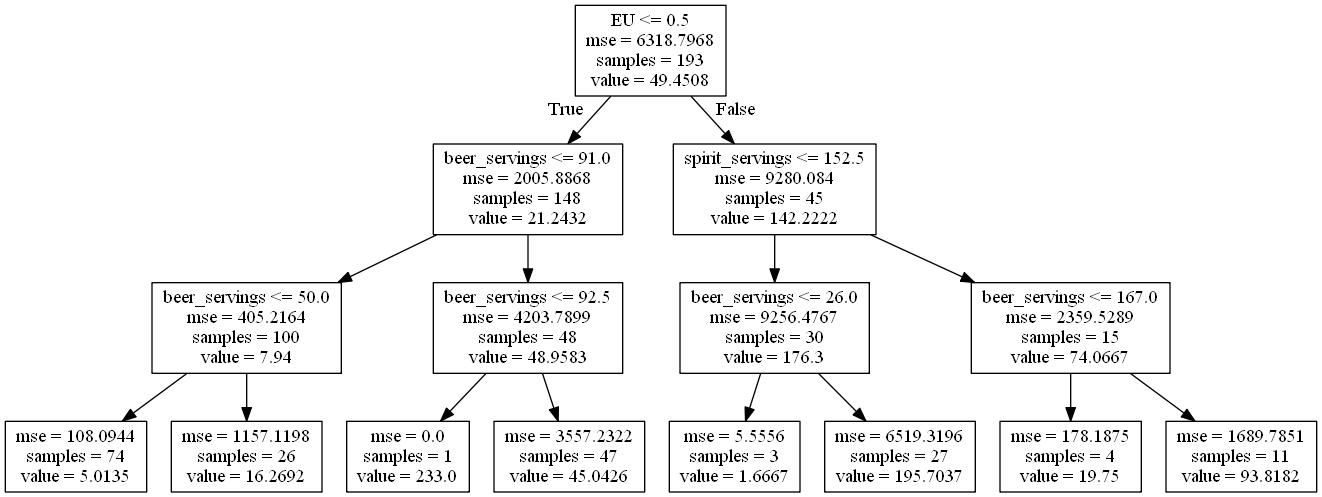

In [35]:
# If graphviz is set up and working for you, what does the
# decision tree look like?
import StringIO
s = StringIO.StringIO()
tree.export_graphviz(drinks_regressor, out_file=s, feature_names=['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'beer_servings', 'spirit_servings'])
import pydotplus
graph = pydotplus.graph_from_dot_data(s.getvalue())
import IPython.display
IPython.display.Image(graph.create_png())

In [36]:
# What are the most important features for predicting wine?
drinks_force.fit(X,y)
drinks_force.best_params_

{'max_depth': 3}

In [37]:
drinks_force.best_score_

0.33993226811732125

In [38]:
# Try some sample numbers, example how good the prediction is, etc.
drinks.drop(drinks.columns[[4,5,6,7,8,9,10,11]], axis=1, inplace=True)

In [41]:
drinks['wine_servings_prediction'] = drinks_force.predict(X)
drinks

,country,beer_servings,spirit_servings,wine_servings,wine_servings_prediction
0,Afghanistan,0,0,0,5.013514
1,Albania,89,132,54,195.703704
2,Algeria,25,0,14,5.013514
3,Andorra,245,138,312,195.703704
4,Angola,217,57,45,45.042553
5,Antigua & Barbuda,102,128,45,45.042553
6,Argentina,193,25,221,45.042553
7,Armenia,21,179,11,19.750000
8,Australia,261,72,212,45.042553
9,Austria,279,75,191,195.703704


In [42]:
%matplotlib inline

import matplotlib.pyplot as plt

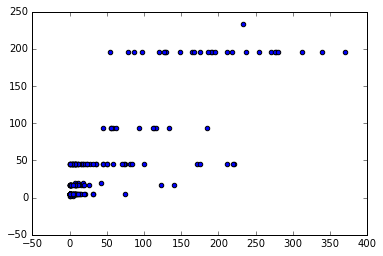

In [43]:
plt.scatter(drinks.wine_servings, drinks.wine_servings_prediction)